In [1]:
import cv2
import glob
import numpy as np

from keras import layers, models, optimizers

from keras.models import Model,Sequential
from keras.layers import Dense,Flatten,Dropout
from keras.utils import to_categorical
from keras.layers import Input,Dense,Dropout,BatchNormalization,Conv2D,MaxPooling2D,AveragePooling2D,concatenate
from keras.layers.convolutional import Conv2D,MaxPooling2D,AveragePooling2D

%matplotlib inline

Using TensorFlow backend.


## 处理数据

In [2]:
TRAIN_CAT_PATH='data/all/training_set/cats/'
TRAIN_DOG_PATH='data/all/training_set/dogs/'

img_width = 150
img_height = 150

In [3]:
def load_images(image_folder):
    images = []
    for i, img in enumerate(glob.glob(image_folder + '*')):
        image = cv2.imread(img)
        image = cv2.resize(image, (img_width, img_height), interpolation=cv2.INTER_CUBIC)
        image = np.array(image) / 255.0
        images.append(image)
    return images

In [4]:
img_cats = load_images(TRAIN_CAT_PATH)
img_dogs = load_images(TRAIN_DOG_PATH)


In [5]:
img_all = img_cats + img_dogs
label_all = [1] * len(img_cats) + [0] * len(img_dogs)
assert(len(img_all) == len(label_all))

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(img_all, label_all, test_size=0.1, shuffle=True)
X_train = np.asanyarray(X_train)
X_test = np.asanyarray(X_test)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(X_train.shape)
print(X_test.shape)

(7119, 150, 150, 3)
(791, 150, 150, 3)


(7119, 150, 150, 3)
(791, 150, 150, 3)


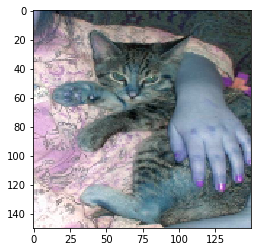

In [7]:
import matplotlib.pyplot as plt

plt.imshow(X_train[22].squeeze(), cmap='gray')
print(X_train.shape)
print(X_test.shape)
# print(X_train[1])
# print(X_train[1].T)

In [8]:
model = Sequential()

model.add(layers.Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(32, (3, 3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, (3, 3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2))
model.add(layers.Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        18496     
__________

In [9]:
model.fit(X_train, y_train, epochs=10, batch_size=10, validation_data=(X_test, y_test))

Train on 7119 samples, validate on 791 samples
Epoch 1/10
7119/7119 [==============================] - 138s 19ms/step - loss: 0.6743 - acc: 0.5827 - val_loss: 0.6158 - val_acc: 0.6542
Epoch 2/10
7119/7119 [==============================] - 138s 19ms/step - loss: 0.6067 - acc: 0.6799 - val_loss: 0.5937 - val_acc: 0.6928
Epoch 3/10
7119/7119 [==============================] - 139s 20ms/step - loss: 0.5712 - acc: 0.7239 - val_loss: 0.5605 - val_acc: 0.7282
Epoch 4/10
7119/7119 [==============================] - 139s 20ms/step - loss: 0.5326 - acc: 0.7506 - val_loss: 0.5880 - val_acc: 0.7509
Epoch 5/10
7119/7119 [==============================] - 139s 20ms/step - loss: 0.5132 - acc: 0.7665 - val_loss: 0.5797 - val_acc: 0.7623
Epoch 6/10
7119/7119 [==============================] - 139s 20ms/step - loss: 0.5025 - acc: 0.7774 - val_loss: 0.6377 - val_acc: 0.7743
Epoch 7/10
7119/7119 [==============================] - 139s 20ms/step - loss: 0.4858 - acc: 0.7905 - val_loss: 0.5561 - val_acc: 0

In [11]:
model.save('models/model_test_1.h5')